In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# we need this in later phases
def activation_ReLu(value):
    if value > 0:
        return value
    else: 
        return 0
    
# we need this in later phases
def activation_ReLu_partial_derivative(value):
    if value > 0:
        return 1
    else: 
        return 0

In [8]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# since our neural network can only handle two variables + target variable
# let's select age, bmi and charges
# basically our x1, x2 and target is y (charges)
df = df[["age", "bmi", "charges"]]

In [10]:
# initialize weights and biases
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1

# and the biases
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# save the original weights and biases for comparison in the end
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# learning rate for gradient descent (optimizer)
LR = 0.005
epochs =  300

# replace with generated data (30 rows)
data = list(df.values)

# let's scale our values with min/max -scaling
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# points for plotting loss later
loss_points = []

# train the neural network
for epoch in range(epochs):

    # make a helper list, that keeps track of loss values in this epoch
    epoch_losses = []

    for row in data:
        # unpack the data into original variables
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        # FORWARD PASS

        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        node_1_output

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)
        node_2_output

        # NODE 3 OUTPUT 
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)
        node_3_output

        # calculate the loss for this forward pass
        predicted_value = node_3_output

        # note to self in future
        # this will probably crash if the loss value gets too high
        # replace with NumPy float64 if needed
        loss = (predicted_value - true_value) ** 2
        
        # add the loss of this data row
        # into the current epoch losses
        epoch_losses.append(loss)

        # BACK PROPAGATION - LAST LAYER

        # partial derivative of loss function with respect to w5
        # use gradient descent to get updated value for w5
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        # partial derivative of loss function with respect to w6
        # use gradient descent to get updated value for w6
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        # partial derivative of loss function with respect to bias 3
        # use gradient descent to get updated value for bias 3
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # FROM THIS POINT FORWARD, WE HAVE TO USE THE CHAIN RULE
        # IN ORDER TO ACCESS THE NEXT LAYER AFTER THE FINAL LAYER

        # chain rule + partial derivations to solve new value for w1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative((input1 * w1) + (input2 * w3) + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        # chain rule + partial derivations to solve new value for w2
        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative((input1 * w2) + (input2 * w4) + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        # chain rule + partial derivations to solve new value for w3
        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative((input1 * w1) + (input2 * w3) + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        # chain rule + partial derivations to solve new value for w4
        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative((input1 * w2) + (input2 * w4) + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # chain rule + partial derivations to solve new value for bias 1
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        # chain rule + partial derivations to solve new value for bias 2
        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # finally replace old weights with the new ones
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3
    

    # calculate the average loss for WHOLE epoch
    average_loss = sum(epoch_losses) / len(epoch_losses)

    loss_points.append(average_loss)
    print(f"Epoch: {epoch + 1}, loss: {average_loss}")
    
print("--------------------------")
print("ORIGINAL WEIGHTS/BIASES:\n")
print(f"W1: {original_w1}")
print(f"W2: {original_w2}")
print(f"W3: {original_w3}")
print(f"W4: {original_w4}")
print(f"W5: {original_w5}")
print(f"W6: {original_w6}")
print(f"B1: {original_b1}")
print(f"B2: {original_b2}")
print(f"B3: {original_b3}")

# IDEA: have a small amount of epochs
# but print the current weights after each epoch
# can you see a certain development in certain
# weights and biases? discuss.
print("--------------------------")
print("FINAL WEIGHTS/BIASES:\n")
print(f"W1: {w1}")
print(f"W2: {w2}")
print(f"W3: {w3}")
print(f"W4: {w4}")
print(f"W5: {w5}")
print(f"W6: {w6}")
print(f"B1: {bias1}")
print(f"B2: {bias2}")
print(f"B3: {bias3}")

Epoch: 1, loss: 0.04216958995368006
Epoch: 2, loss: 0.03668692536297482
Epoch: 3, loss: 0.03668584418001817
Epoch: 4, loss: 0.036684773238985315
Epoch: 5, loss: 0.036683712432889426
Epoch: 6, loss: 0.03668266165607415
Epoch: 7, loss: 0.03668162080419311
Epoch: 8, loss: 0.03668058977419378
Epoch: 9, loss: 0.036679568464298026
Epoch: 10, loss: 0.03667855677398506
Epoch: 11, loss: 0.036677554603973934
Epoch: 12, loss: 0.036676561856205915
Epoch: 13, loss: 0.036675578433827245
Epoch: 14, loss: 0.036674604241172526
Epoch: 15, loss: 0.03667363918374801
Epoch: 16, loss: 0.0366726831682151
Epoch: 17, loss: 0.036671736102373835
Epoch: 18, loss: 0.03667079789514689
Epoch: 19, loss: 0.03666986845656401
Epoch: 20, loss: 0.03666894769774603
Epoch: 21, loss: 0.03666803553088955
Epoch: 22, loss: 0.036667131869251524
Epoch: 23, loss: 0.03666623662713462
Epoch: 24, loss: 0.03666534971987142
Epoch: 25, loss: 0.03666447106381163
Epoch: 26, loss: 0.036663600576305334
Epoch: 27, loss: 0.036662738175690254


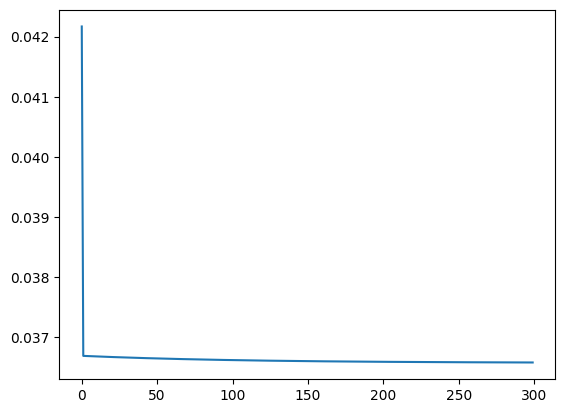

In [11]:
# plot the loss for the epochs
plt.plot(loss_points)
plt.show()

In [12]:
# prediction is basically just doing the forward 
# pass again (but only that)
def predict(x1, x2):
    # NODE 1 OUTPUT
    node_1_output = x1 * w1 + x2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)
    node_1_output

    # NODE 2 OUTPUT
    node_2_output = x1 * w2 + x2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)
    node_2_output

    # NODE 3 OUTPUT 
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)
    node_3_output

    return node_3_output

In [13]:
# get a test row in original values:
df.iloc[0:1]

,age,bmi,charges
0,19,27.9,16884.924


In [14]:
# get the same row in scaled version
# you can google for decimal formats, for example:
# "4.76829326e-05 in decimal format"
data[0]

array([4.76829326e-05, 1.87280992e-04, 2.64592656e-01])

In [15]:
# x1 = 0.00004768293 (19 years of age)
# x2 = 0.00018728099 (27.9 BMI)
# y/target = 0.264592656 (16884.924)

In [16]:
# output with scaled values is this
# if you multiply this with the MAX value of charges, 
# you get USD value
predict(0.00004768293, 0.00018728099)

0.20775970824147805

In [17]:
# get the USD value
df['charges'].max() * predict(0.00004768293, 0.00018728099)

13248.92551779178

In [18]:
df.corr()

,age,bmi,charges
age,1.000000,0.113048,0.298624
bmi,0.113048,1.000000,0.199846
charges,0.298624,0.199846,1.000000
